In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
#creating training data
DATADIR = 'image_dataset_anomaly_detection/train'
DATADIR_test = 'image_dataset_anomaly_detection/test'
CATEGORIES = ['normal', 'anomaly']

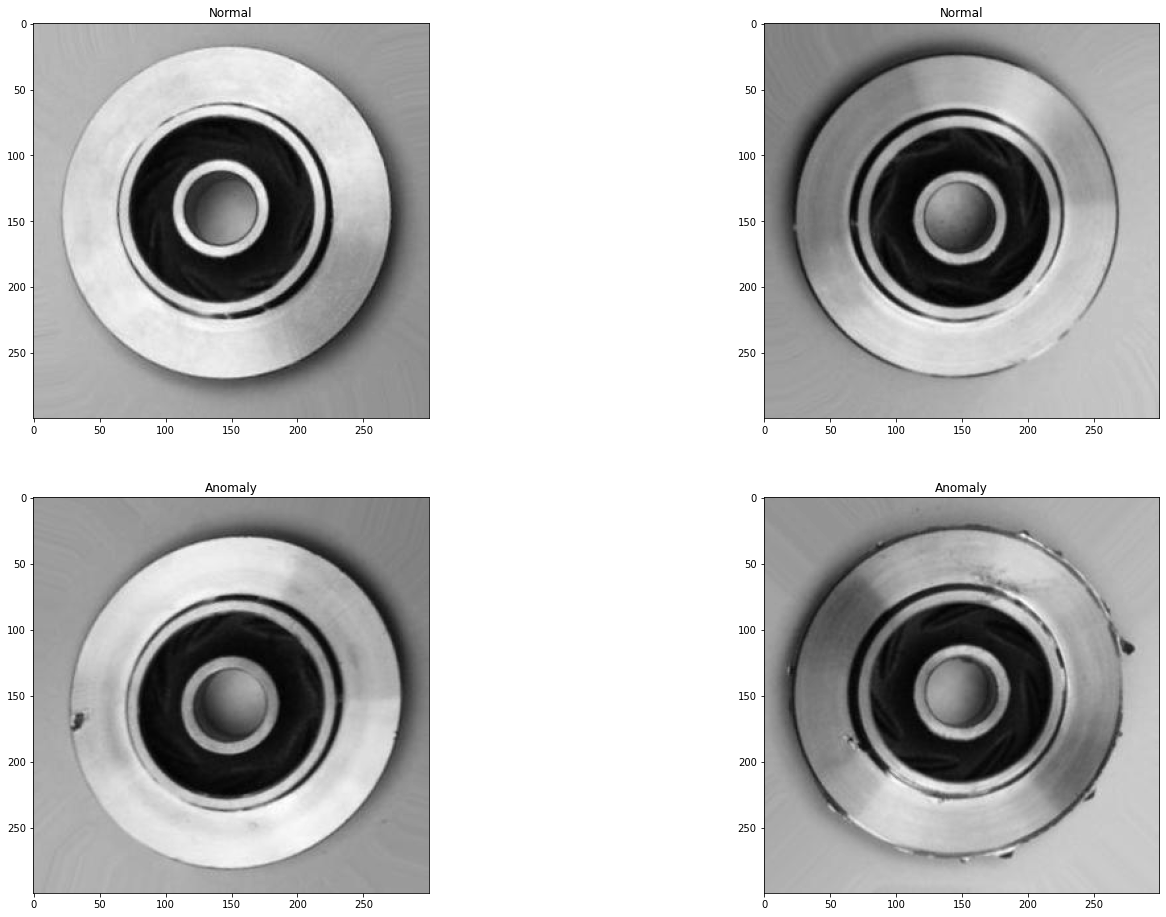

In [4]:
plt.figure(figsize=(24,16))
idx = 0
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path)[:2]:
        plt.subplot(2,2,idx+1)
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.title('Anomaly' if category == 'anomaly' else 'Normal')
        plt.imshow(img_array,cmap='gray')
        idx += 1
        if idx == 4:
          break

In [5]:
print(img_array)

[[150 150 150 ... 181 181 181]
 [150 150 150 ... 181 181 181]
 [150 150 149 ... 181 181 181]
 ...
 [176 176 176 ... 201 201 202]
 [176 176 176 ... 201 201 201]
 [176 176 176 ... 200 201 201]]


In [6]:
img_array.shape

(300, 300)

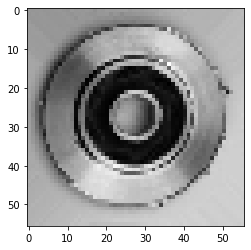

In [118]:
IMG_SIZE = 56

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

## Training the Model

In [119]:
input_CATEGORIES = ['normal']
training_data = []
def create_training_data():
    for category in input_CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array,class_num])

create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2875/2875 [00:03<00:00, 805.28it/s]


In [ ]:
input_CATEGORIES = ['normal']
latent_space_img_size = 28
training_data_28x28 = []
def create_training_data():
    for category in input_CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (latent_space_img_size, latent_space_img_size))
            training_data_28x28.append([new_array,class_num])

create_training_data()

In [120]:
input_CATEGORIES = ['normal']
testing_data = []
def create_testing_data():
    for category in input_CATEGORIES:
        path_test = os.path.join(DATADIR_test, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path_test)):
            img_array = cv2.imread(os.path.join(path_test,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            testing_data.append([new_array,class_num])

create_testing_data()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 786.47it/s]


In [ ]:
input_CATEGORIES = ['normal']
testing_data_28x28 = []
def create_testing_data():
    for category in input_CATEGORIES:
        path_test = os.path.join(DATADIR_test, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path_test)):
            img_array = cv2.imread(os.path.join(path_test,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (latent_space_img_size, latent_space_img_size))
            testing_data_28x28.append([new_array,class_num])

create_testing_data()

In [121]:
print(len(training_data))

2875


In [122]:
print(len(testing_data))

262


In [123]:
X = []
y= []

for features,label in tqdm(training_data):
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2875/2875 [00:00<00:00, 861822.76it/s]


In [ ]:
X_28x28 = []

for features,label in tqdm(training_data_28x28):
    X_28x28.append(features)
    
X_28x28 = np.array(X_28x28).reshape(-1, latent_space_img_size, latent_space_img_size, 1)

In [124]:
X_test = []
y_test= []

for features,label in tqdm(testing_data):
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 479244.50it/s]


In [ ]:
X_test_28x28 = []

for features,label in tqdm(testing_data_28x28):
    X_test_28x28.append(features)
    
X_test_28x28 = np.array(X_test_28x28).reshape(-1, latent_space_img_size, latent_space_img_size, 1)

# Preprocess Data

In [125]:
def preprocess_data_vae(X_train):
  X_train = X_train.astype('float32')
  X_train -= 127.5
  X_train /= 127.5

  return X_train

##Augmentation

In [ ]:
np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

# Import Additional Libraries

In [15]:
import keras
from keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Dense, Conv2DTranspose, Flatten, GlobalAveragePooling2D, Reshape, Activation, add, concatenate, Dropout
from keras.models import Model, Sequential
from keras import optimizers
import keras.utils
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
from keras import backend as K

from tensorflow import keras
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint

2022-02-27 08:54:18.498759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/u93525/.conda/envs/studyenv/lib/python3.9/site-packages/cv2/../../lib64:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/vpl/2022.0.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/tbb/2021.5.1/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/rkcommon/1.8.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/ospray_studio/0.9.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/ospray/2.8.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/openvkl/1.1.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/oidn/1.4.2/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/mpi/2021.5.1//libfabric/lib:/glob/development-tools/versions/oneapi/2022.1.2/

# TensorBoard

In [39]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

# Convolutional AutoEncoder Anomaly Detection Model

In [ ]:
model_used = 'ConvAE'

def convolutional_autoencoder(input_img, orig_img):
    # encoder
    conv1 = Conv2D(32, (3,3), activation='leaky_relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv2 = Conv2D(64, (3,3), activation='leaky_relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    conv3 = Conv2D(128, (3,3), activation='leaky_relu', padding='same')(pool2)

    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    conv4 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(pool3)
    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
    conv5 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(pool4)
    pool5 = MaxPooling2D(pool_size=(2,2))(conv5)
    conv6 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(pool5)
    
    flatten = Flatten()(conv6)
    dense1 = Dense(784)(flatten)
    flatten2 = Flatten()(dense1)
    flatten2 = Reshape((28,28,1))(flatten2)
    merge = concatenate([flatten2, orig_img])
        
    # decoder
    conv7 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(merge)
    up1 = UpSampling2D((2,2))(conv7)
    conv8 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv8)
    conv9 = Conv2D(128, (3,3), activation='leaky_relu', padding='same')(up2)
    up3 = UpSampling2D((2,2))(conv9)
    conv10 = Conv2D(64, (3,3), activation='leaky_relu', padding='same')(up3)
    decoded = Conv2D(1, (3,3), activation='leaky_relu', padding='same')(conv10)
    out = Activation('sigmoid')(decoded)
    
    return out

def preprocess_data(X_train):
  X_train = X_train.astype('float32')
  X_train /= 255

  return X_train

def preprocess_data_28x28(X_train):
  X_train = X_train.astype('float32')
  X_train -= 127.5
  X_train /= 127.5

  return X_train

# Variational AutoEncoder (VAE)

In [17]:
model_used = 'VAE'

def variational_autoencoder(input_img, labels, size):
    reshape1 = Reshape(target_shape=(size[0]*size[1],))(input_img)
    # encoder
    encoder_input = Dense(1024, activation='leaky_relu', input_shape=(size[0]*size[1],))(reshape1)
    h = Dense(512, activation='leaky_relu')(encoder_input)
    h = Dense(256, activation='leaky_relu')(h)
    encoder_output = Dense(256, activation='leaky_relu')(h)
    
    # decoder
    decoder_input = Dense(256, activation='leaky_relu')(encoder_output)
    h = Dense(256, activation='leaky_relu')(decoder_input)
    h = Dense(512, activation='leaky_relu')(h)
    h = Dense(1024, activation='leaky_relu')(h)
    decoded = Dense(size[0]*size[1], activation='leaky_relu')(h)
    reshape2 = Reshape(target_shape=(size[0], size[1], 1))(decoded)
    
    return reshape2

# Data Generator for Fitting Model

In [29]:
import scipy

def augment_images(images, greedy=0.69, angle=90, scale=1.0, grayscale=False):
    # flip image
    if grayscale:
        result = np.zeros((len(images)*2,IMG_SIZE,IMG_SIZE,1))
    else:
        result = np.zeros((len(images)*2,IMG_SIZE,IMG_SIZE,3))
    for ii in range(0,len(images),1):
        result[2*ii] = images[ii].copy()
        if greedy > np.random.uniform(0.0, 1.0):
            result[2*ii+1] = cv2.resize(scipy.ndimage.rotate(images[ii], angle=np.random.uniform(0, angle), reshape=True), (IMG_SIZE,IMG_SIZE)).reshape(IMG_SIZE,IMG_SIZE,1)
        else:
            result[2*ii+1] = cv2.flip(images[ii], 1).reshape(IMG_SIZE,IMG_SIZE,1)
    return result

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, list_IDs, labels, batch_size=64, dim=(224*224), n_channels=1,
                 n_classes=2, shuffle=True, valid=False):
        'Initialization'
        self.data = data
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.valid = valid

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X_batch = np.empty((self.batch_size, *self.dim))
        y_batch = np.empty((self.batch_size, *self.dim))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            if self.valid:
              image_normal = self.data[ID]
            else:
              image_normal = self.data[ID]

            X_batch[i,] = image_normal
        
        X_batch = augment_images(X_batch, grayscale=True)
        y_batch = X_batch.copy()
        
        X_batch = preprocess_data_vae(X_batch)
        y_batch = preprocess_data_vae(y_batch)

        return X_batch, y_batch

train_ids = list(range(0,len(X)))
test_ids = list(range(0,len(X_test)))

# Parameters
params1 = {'dim': (224,224,1),
          'batch_size': 64,
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True, 
          'valid':True}
params2 = {'dim': (224,224,1),
          'batch_size': 64,
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True, 
          'valid':False}

# Datasets
partition = {'train': train_ids, 'validation': test_ids}
labels = {'train': y, 'validation': y_test}

# Generators
training_generator = DataGenerator(X, partition['train'], labels['train'], **params2)
validation_generator = DataGenerator(X_test, partition['validation'], labels['validation'], **params1)

In [30]:
from __future__ import print_function

batch_size = 32
num_classes = 1
epochs = 25

# input image dimensions
if model_used == 'ConvAE':
  img_rows, img_cols = IMG_SIZE,IMG_SIZE
  X_train, X_test = preprocess_data(X, X_test)
  X_train_28x28, X_test_28x28 = preprocess_data_28x28(X_28x28, X_test_28x28)
elif model_used == 'VAE':
  img_rows, img_cols = 56,56
  # X_train, X_test = preprocess_data(X, X_test)


# the data, split between train and test sets
if model_used == 'ConvAE':
  x_train, y_train, x_val, y_val = X,y,X_test,y_test
  x_train_28x28, x_val_28x28 = X_train_28x28, X_test_28x28
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_val.shape[0], 'validation samples')
elif model_used == 'VAE':
  print('Training shape: ', training_generator[0][0].shape)

if K.image_data_format() == 'channels_first':
    # x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    # x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    # x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols, 1)

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=3, mode='min', verbose=1)

def SSIMError(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

if model_used == 'ConvAE':
  input_img = Input(shape=(224,224,1))
  orig_img = Input(shape=(28,28,1))
  model = Model(inputs=[input_img, orig_img], outputs=convolutional_autoencoder(input_img, orig_img))
  checkpoint = ModelCheckpoint('model_best_weights_anomaly_detection_convae.h5', monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)
  model.compile(loss=keras.losses.mean_squared_error,
                optimizer=keras.optimizers.Adam(learning_rate=0.001, decay=1e-5),
                metrics=['accuracy'])

  model_train = model.fit([x_train, x_train_28x28], y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=([x_val, x_val_28x28], y_val),
            callbacks=[tensorboard_callback,early_stop,checkpoint])
  score = model.evaluate([x_val, x_val_28x28], y_val, verbose=0)
elif model_used == 'VAE':
  input_img = Input(shape=(IMG_SIZE,IMG_SIZE,))
  model = Model(inputs=input_img, outputs=variational_autoencoder(input_img, (IMG_SIZE,IMG_SIZE)))
  checkpoint = ModelCheckpoint('model_best_weights_anomaly_detection_vae.h5', monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)
  model.compile(loss=keras.losses.mean_squared_error,
                optimizer=keras.optimizers.Adam(learning_rate=0.001, decay=1e-5),
                metrics=[SSIMError])

  model_train = model.fit(training_generator,
            epochs=epochs,
            verbose=1,
            max_queue_size=100,
            validation_data=validation_generator,
            callbacks=[tensorboard_callback,early_stop,checkpoint])

Training shape:  (64, 224, 224, 1)


2022-02-27 09:16:35.437710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/u93525/.conda/envs/studyenv/lib/python3.9/site-packages/cv2/../../lib64:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/vpl/2022.0.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/tbb/2021.5.1/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/rkcommon/1.8.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/ospray_studio/0.9.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/ospray/2.8.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/openvkl/1.1.0/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/oidn/1.4.2/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/mpi/2021.5.1//libfabric/lib:/glob/development-tools/versions/oneapi/2022.1.2/oneapi/mpi

Epoch 1/25
89/89 [==============================] - ETA: 0s - loss: 0.1273 - SSIMError: 0.1438WARNING:tensorflow:Model was constructed with shape (None, 224, 224) for input KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (None, None, None, None).

Epoch 00001: loss improved from inf to 0.12735, saving model to model_best_weights_anomaly_detection_vae.h5
89/89 [==============================] - 119s 1s/step - loss: 0.1273 - SSIMError: 0.1438 - val_loss: 0.0696 - val_SSIMError: 0.2286
Epoch 2/25
89/89 [==============================] - ETA: 0s - loss: 0.0628 - SSIMError: 0.2554
Epoch 00002: loss improved from 0.12735 to 0.06283, saving model to model_best_weights_anomaly_detection_vae.h5
89/89 [==============================] - 116s 1s/step - loss: 0.0628 - SSIMError: 0.2554 - val_loss: 0.0544 - val_SSIMError: 0.2814
Epoch 3/25
89/89

In [36]:
input_CATEGORIES = ['anomaly']
testing_data = []
def create_testing_data():
    for category in input_CATEGORIES:
        path_test = os.path.join(DATADIR_test, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path_test)):
            img_array = cv2.imread(os.path.join(path_test,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            testing_data.append([new_array,class_num])

create_testing_data()

X_test = []
y_test= []

for features,label in tqdm(testing_data):
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

score = model.evaluate(X_test[:64], X_test[:64], verbose=0)

print('Test loss: ', score[0])
print('Test SSIMError: ', score[1])
print('Test SSIM Difference: ', 1 - score[1])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 453/453 [00:00<00:00, 1733594.63it/s]


Test loss:  11628.259765625
Test SSIMError:  0.0016881858464330435
Test SSIM Difference:  0.998311814153567


In [44]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2617568), started 0:01:37 ago. (Use '!kill 2617568' to kill it.)

In [45]:
!kill 2617568

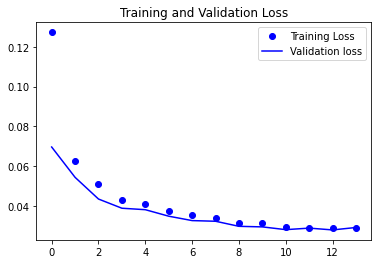

In [46]:
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(14))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

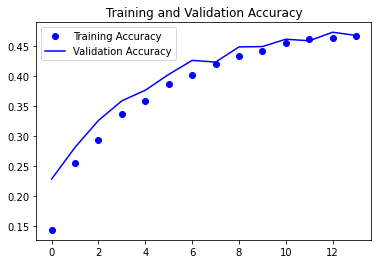

In [50]:
loss = model_train.history['SSIMError']
val_loss = model_train.history['val_SSIMError']
epochs = list(range(14))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [51]:
model.save('model_best_weights_anomaly_detection_vae_completion.h5')

Test image
Predicted image


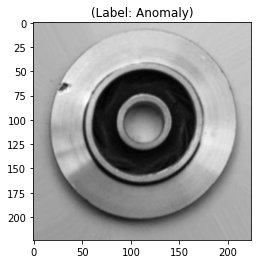

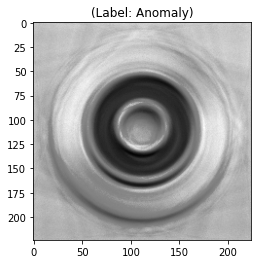

In [59]:
from keras.models import load_model
from glob import glob

vae_model = load_model('model_best_weights_anomaly_detection_vae_completion.h5', {'SSIMError': SSIMError})

label = 100

path = os.path.join(DATADIR_test, 'anomaly')

test_X = cv2.resize(cv2.imread(glob(path + "/*")[label], cv2.IMREAD_GRAYSCALE), (224,224))
test_Y = 'Anomaly'
test_X = (test_X.reshape(-1,224,224)-127.5)/127.5
pred = vae_model.predict(test_X)

plt.figure(figsize=(20,4))
print("Test image")
plt.imshow(test_X.reshape(224,224), cmap='gray')
curr_lbl = test_Y
plt.title("(Label: " + str(curr_lbl) + ")")

plt.figure(figsize=(20,4))
print("Predicted image")
plt.imshow(pred.reshape(224,224), cmap='gray')
curr_lbl = test_Y
plt.title("(Label: " + str(curr_lbl) + ")")
    
plt.show()

In [65]:
CATEGORIES = ['normal', 'anomaly']
testing_data = []
def create_testing_data():
    for category in CATEGORIES:
        path_test = os.path.join(DATADIR_test, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path_test)):
            img_array = cv2.imread(os.path.join(path_test,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            testing_data.append([new_array,class_num])

create_testing_data()

X_test = []
y_test = []

for features, label in tqdm(testing_data):
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

ssim = {0: [], 1: []}

def SSIMLoss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

vae_model = load_model("model_best_weights_anomaly_detection_vae_completion.h5", {'SSIMError': SSIMError})

for label in tqdm(range(0,len(X_test))):
    test_X = X_test[label]
    test_Y = y_test[label]
    test_X = (test_X.reshape(-1,224,224,1)-127.5)/127.5
    pred = vae_model.predict(test_X)

    ssim[y_test[label]].append(SSIMLoss(test_X.reshape(-1,224,224,1).astype(np.float32), pred.reshape(-1,224,224,1).astype(np.float32)))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 715/715 [03:16<00:00,  3.64it/s]


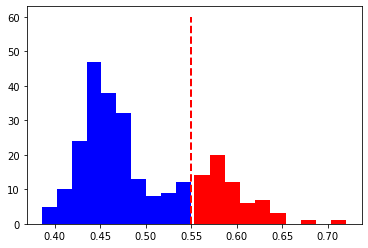

In [116]:
s1 = np.array([s_.numpy() for s_ in ssim[0]])
plt.hist(s1[s1>0.55], color='red')
plt.hist(s1[s1<=0.55], color='blue')
plt.vlines(x=0.55, ymax=60, ymin=0, ls='dashed', lw=2, color='red')
plt.show()

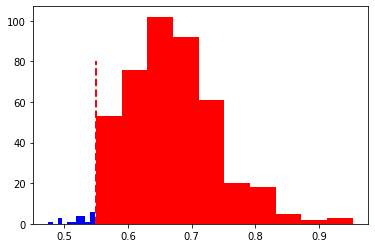

In [115]:
s2 = np.array([s_.numpy() for s_ in ssim[1]])
plt.hist(s2[s2>0.55], color='red')
plt.hist(s2[s2<=0.55], color='blue')
plt.vlines(x=0.55, ymax=80, ymin=0, ls='dashed', lw=2, color='red')
plt.show()

# Finding the right cut-off point for the Difference of SSIM Scores

In [97]:
accuracy_score(y_test, get_labels(0.4))

0.6405594405594406

In [98]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def get_labels(cutoff):
    normal_ssim = np.array(ssim[0])
    anomaly_ssim = np.array(ssim[1])
    y_pred_normal = [0 if value < cutoff else 1 for value in normal_ssim]
    y_pred_anomaly = [0 if value < cutoff else 1 for value in anomaly_ssim]

    return y_pred_normal + y_pred_anomaly

accuracy = []
recall = []
precision = []
f1 = []
roc_auc = []

for cutoff in tqdm(np.arange(0.4, 0.7, 0.01)):
    y_pred = get_labels(cutoff)
    Accuracy = accuracy_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    F1_Score = f1_score(y_test, y_pred)
    ROC_AUC_Score = roc_auc_score(y_test, y_pred)
    
    accuracy.append(Accuracy)
    recall.append(Recall)
    precision.append(Precision)
    f1.append(F1_Score)
    roc_auc.append(ROC_AUC_Score)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 147.82it/s]


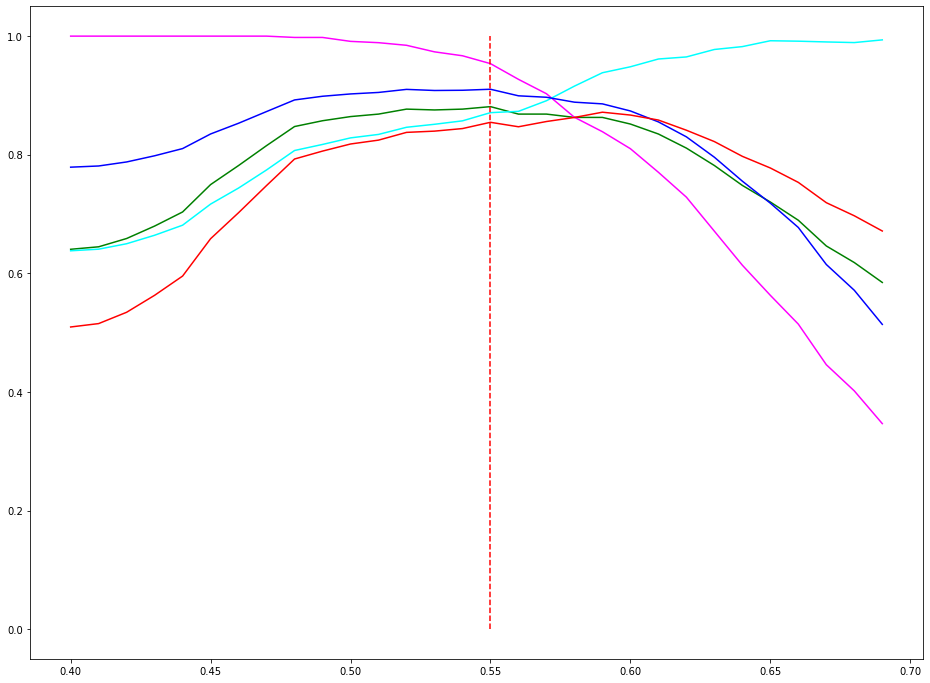

In [100]:
plt.figure(figsize=(16,12))
plt.plot(np.arange(0.4, 0.7, 0.01), accuracy, color='green')
plt.plot(np.arange(0.4, 0.7, 0.01), recall, color='magenta')
plt.plot(np.arange(0.4, 0.7, 0.01), precision, color='cyan')
plt.plot(np.arange(0.4, 0.7, 0.01), f1, color='blue')
plt.plot(np.arange(0.4, 0.7, 0.01), roc_auc, color='red')
plt.vlines(x=0.55, ymax=1.0, ymin=0.0, linestyles='dashed', colors='red')
plt.show()

In [112]:
accuracy_score(y_test, get_labels(0.55))

0.8811188811188811